In [1]:
import os
import sys
import random
import math
import re
import time
import numpy as np

from keras import backend as K

import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project


ROOT_DIR = os.path.abspath("../..")

Using TensorFlow backend.
/home/jho/anaconda3/envs/maskrcnn-tf10-py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jho/anaconda3/envs/maskrcnn-tf10-py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jho/anaconda3/envs/maskrcnn-tf10-py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [3]:
# Import Mask RCNN
sys.path.append(ROOT_DIR)
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

from samples.face import face

%matplotlib inline

In [5]:
# Directory to save trained models
MODEL_DIR = os.path.join(ROOT_DIR, "logs/weights")

## Notebook Preferences

In [6]:
def get_ax(rows=1, cols=1, size=8):
    """
    Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default isze attribute to control the size
    of rendered images
    """
    
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax


## Test ImgAug

In [ ]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
from imguag.augmentables.segmaps import SegmentationMapsOnImage

ia.seed(1)

# Load an example image (unit)

In [ ]:
## Configurations

Configurations are defined in face.py


config = face.FaceConfig()
config.display()

config.IMAGE_MAX_DIM = 512 # Override the resizing options from 256 to 1024.
config.STEPS_PER_EPOCH = 3200 # Override the value of steps per epoch


FACE_DIR = os.path.join(ROOT_DIR, "samples/face/face_data")

# Directory to save weights
FACE_MODEL_DIR = os.path.join(MODEL_DIR, 'face')

# Which weights to start with?
init_weight = "coco"
custom_weight_path = os.path.join(FACE_MODEL_DIR, "coco/face_epochs10(5)_steps3200_resize512")

# Set epochs
head_epochs = 1
middle_epochs = 3
all_epochs = 4

tag = "coco_epochs1h-2m-1a"

# Directory to save events
import datetime

EVENT_DIR = os.path.join(ROOT_DIR, "logs/events/face_{}_{:%Y%m%dT%H%M}".format(
    tag, datetime.datetime.now()))


# Print this jupyter file's configurations


In [5]:
## Dataset


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  256
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [256 256   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

# Load dataset
# Get the dataset 'CelebA'

# dataset = face.FaceDataset()
# dataset.load_face(FACE_DIR, "train")

# Must call before using the dataset
# dataset.prepare()

# print("Image Count: {}".format(len(dataset.image_ids)))
# print("Class Count: {}".format(dataset.num_classes))
# for i, info in enumerate(dataset.class_info):
#     print("{:3}. {:50}".format(i, info['name']))

In [6]:
### Training dataset

# Training dataset
dataset_train = face.FaceDataset()
dataset_train.load_face(FACE_DIR, 'train', augmentation_sequence=None)
dataset_train.prepare()

print("Image Count: {}".format(len(dataset_train.image_ids)))
print("Class Count: {}".format(dataset_train.num_classes))
for i, info in enumerate(dataset_train.class_info):
    print("{:3}. {:50}".format(i, info['name']))

In [7]:
### Validation Dataset

Loading images: 100%|██████████| 3200/3200 [00:03<00:00, 917.26it/s]


Image Count: 3200
Class Count: 2
  0. BG                                                
  1. face                                              


# Validation dataset
dataset_val = face.FaceDataset()
dataset_val.load_face(FACE_DIR, 'val')
dataset_val.prepare()

print("Image Count: {}".format(len(dataset_val.image_ids)))
print("Class Count: {}".format(dataset_val.num_classes))
for i, info in enumerate(dataset_val.class_info):
    print("{:3}. {:50}".format(i, info['name']))

In [8]:
# # Load and display random samples
# image_ids = np.random.choice(dataset_train.image_ids, 4)
# for image_id in image_ids:
#     image = dataset_train.load_image(image_id)
#     mask, class_ids = dataset_train.load_mask(image_id)
#     visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)
#

Loading images: 100%|██████████| 355/355 [00:00<00:00, 949.44it/s]


Image Count: 355
Class Count: 2
  0. BG                                                
  1. face                                              


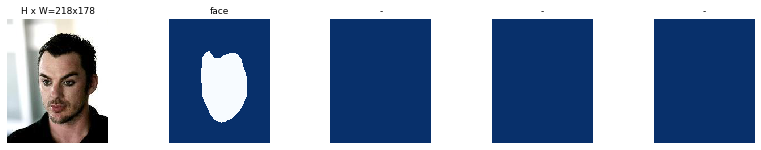

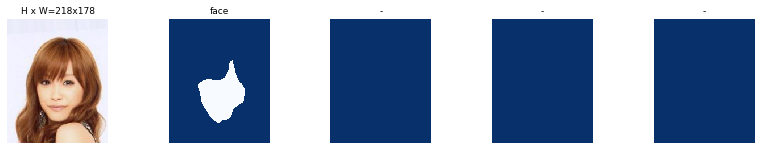

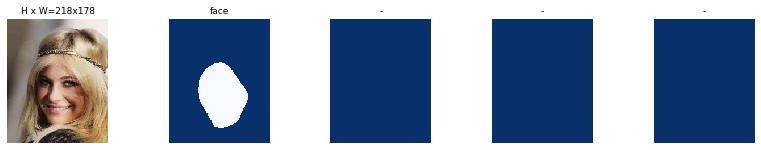

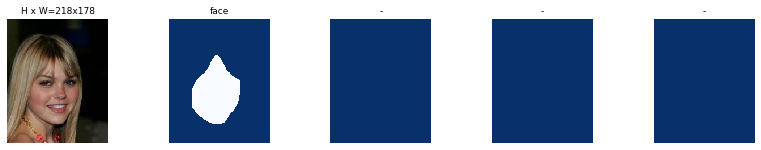

In [9]:
## Create Model

# Create model in training mode
model = modellib.MaskRCNN(
        mode="training", 
        config=config,
        model_dir=MODEL_DIR)

In [10]:

# Directory to save logs and trained model

if init_weight == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_weight == "coco":
    # Load weights trained on MS COCO, but skip layers that
    # are different due to the different number of classes
    # See README for instructions to download the COCO weights
    # Local path to trained weights file
    COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

    # Download COCO trained weights from Releases if needed
    if not os.path.exists(COCO_MODEL_PATH):
        utils.download_trained_weights(COCO_MODEL_PATH)
    # Directory to save logs and trained model
    
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                        exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",
                                 "mrcnn_bbox", "mrcnn_mask"])
    
elif init_weight == "last":
    # Load the last model you trained and continue training
    model.load_weights(model.find_last(), by_name=True)
elif init_weight == "custom":
    if not os.path.exists(custom_weight_path):
        raise FileNotFoundError
    model.load_weights(custom_weight_path)



Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [11]:
## Training

Train in two stages:

 1. Only the heads. Here we're freezing all the backbone layers and training only the randomly intialized layers
 (.e. the ones that we didn't use pre-trained weights from MS COCO).
 To train only the head layers, pass layers='heads' to the train() function.
 2. Fine-tune all layers. For this simple example it's not necessary, but we're including it to show the process.
 Simply pass layers="all to train all layers.

### Augmentation

In [ ]:
import imgaug.augmenters as iaa
aug = iaa.CropAndPad(percent=(-0.25, 0.25))


# Train the head branches
# Passing layers="heads" freezes all layers except the head
# layers. You can also pass a regular expression to select
# which layers to train by name pattern.



model.train(dataset_train, dataset_val,
            event_dir=EVENT_DIR,
            learning_rate=config.LEARNING_RATE,
            epochs=head_epochs,
            layers='heads',
            augmentation=aug)

In [ ]:
# Finetune layers from ResNet stage 4 and up
model.train(dataset_train, dataset_val,
            learning_rate=config.LEARNING_RATE /100,
            epochs=middle_epochs,
            layers='4+',
            augmentation=aug)

In [ ]:
# Fine tune all layers
# Passing layers="all" trains all layers. You can also 
# pass a regular expression to select which layers to
# train by name pattern.
model.train(dataset_train, dataset_val, 
            event_dir=EVENT_DIR,
            learning_rate=config.LEARNING_RATE / 10,
            epochs=all_epochs,
            layers="all",
            augmentation=aug)


Starting at epoch 0. LR=0.001

Checkpoint Path: /home/jho/projects/Mask_RCNN/logs/weights/face20200411T1039/mask_rcnn_face_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed)
mrcnn_mask_deconv      (TimeDistributed)
mrcnn_mask             (TimeDistributed)
Epoch 1/5
2348/3200 [=====================>........] - ETA: 219s - loss: 0.3613 -

/home/jho/anaconda3/envs/mask/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/jho/anaconda3/envs/mask/lib/python3.6/site-packages/keras/engine/training.py:1987: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


In [ ]:
# Fine tune all layers
# Passing layers="all" trains all layers. You can also 
# pass a regular expression to select which layers to
# train by name pattern.
model.train(dataset_train, dataset_val, 
            event_dir=EVENT_DIR,
            learning_rate=config.LEARNING_RATE / 10,
            epochs=all_epochs,
            layers="all")

In [ ]:
# Save weights
# Typically not needed because callbacks save after every epoch
# Uncomment to save manually
# model_path = os.path.join(MODEL_DIR, "mask_rcnn_shapes.200324.h5")
# model.keras_model.save_weights(model_path)


import pathlib
pathlib.Path(FACE_MODEL_DIR).mkdir(exist_ok=True)

model_path = os.path.join(FACE_MODEL_DIR, init_weight)

model_path = os.path.join(model_path, 'face_epochs{}({})_steps{}_resize{}.h5'.format(all_epochs, head_epochs, config.STEPS_PER_EPOCH, config.IMAGE_MAX_DIM))
model.keras_model.save_weights(model_path)

print("weights saved to {}".format(model_path))